In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
df = pd.read_csv('C:\\Users\\Suraj\Downloads\\Car details updated.csv')

In [14]:
df.head()

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats sold  
0            190Nm@ 2000rpm      5    Y  
1       250Nm@ 1500-2500rpm      5    Y  
2     12.7@ 2,700(kgm@ rpm)      5    Y  
3  22.4 kgm at 1750-2750rpm      5    Y  
4     11.5@ 4,500(kgm@ rpm)      5    Y

In [15]:
df['sold'].value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

#### Which used car was most sold?

<AxesSubplot:>

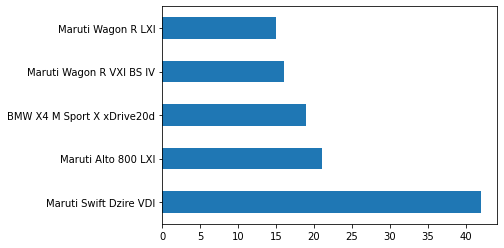

In [16]:
df[df['sold'] == 'Y']['name'].value_counts()[:5].plot(kind = 'barh')

- We can see that Maruti Swift Dzire VDI tops the list in used car selling
- Four of the top 5 used sold cars belongs to maruthi suzuki brand
- Intrestingly posh car BMW is in 3rd position in reused cars to be sold

#### Which car has the maximum selling price ?

In [20]:
df[df['selling_price'] == max(df['selling_price'])]

Sales_ID                           name  year  selling_price  km_driven  \
164       171  Volvo XC90 T8 Excellence BSIV  2017       10000000      30000   

    Region State or Province           City    fuel seller_type transmission  \
164   East          New York  New York City  Petrol  Individual    Automatic   

           owner    mileage   engine max_power          torque  seats sold  
164  First Owner  42.0 kmpl  1969 CC   400 bhp  640Nm@ 1740rpm      4    Y

#### Volvo XC90 T8 Excellence BSIV has the most selling price of 10000000

#### Which car has the minimum selling price ?

In [21]:
df[df['selling_price'] == min(df['selling_price'])]

Sales_ID           name  year  selling_price  km_driven   Region  \
5552      5715  Maruti 800 AC  1997          29999      80000  Central   

     State or Province              City    fuel seller_type transmission  \
5552          Michigan  Dearborn Heights  Petrol  Individual       Manual   

            owner    mileage  engine max_power         torque  seats sold  
5552  Third Owner  16.1 kmpl  796 CC    37 bhp  59Nm@ 2500rpm      4    N

#### Maruti 800 AC should be one of the cheapest cars with selling price of 29999

#### Which used car was least sold ?

<AxesSubplot:>

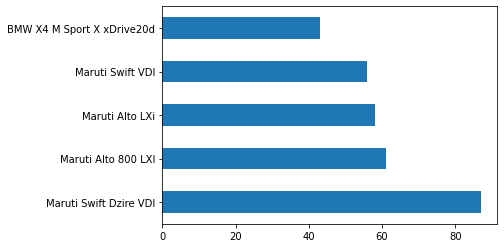

In [17]:
df[df['sold'] == 'N']['name'].value_counts()[:5].plot(kind = 'barh')

#### Even in unsold cars maruti cars tops the list

In [22]:
import seaborn as sns

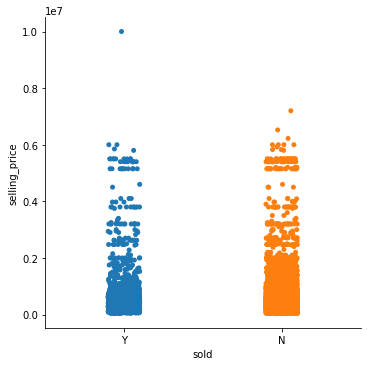

In [23]:
sns.catplot(x='sold',y='selling_price',data=df)

#### The distribution of selling price for sold and unsold categories is quite the same price range except has 2 outliers for sold category. The outlier has to be Volvo XC90 T8 Excellence BSIV as we proved in previous analysis.

#### Lets see if there is relationship between Kilometers driven and Sold

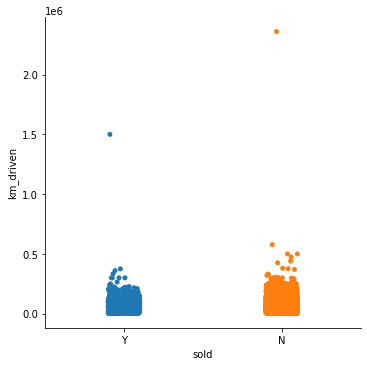

In [24]:
sns.catplot(x="sold", y="km_driven",data=df)

#### Not much of the contribution from kilometers driven to identify sold or unsold. Can see lot of overlapping in terms of points along the y-axis

#### Does the number of owners before the car was sold has any influence in the car being sold?

<AxesSubplot:xlabel='count', ylabel='sold'>

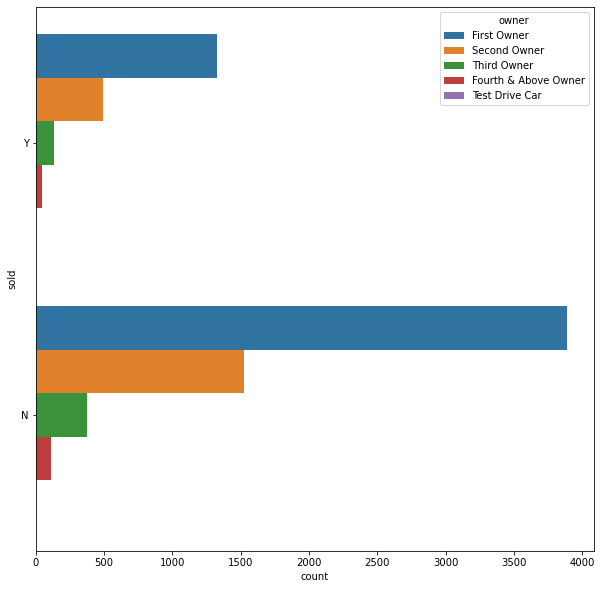

In [29]:
plt.figure(figsize = (10,10))
sns.countplot(y='sold', data=df, orient='h', hue='owner')

#### We can see that the customers prefer the reused car coming from first owner as it would be much recent compare to other owner types. The dataset is more unbalanced i.e Sold(Y=2000,N=6000). 

In [44]:
x = df[df['sold'] == 'Y']['year'].value_counts().sort_index().index
y = df[df['sold'] == 'Y']['year'].value_counts().sort_index().values

In [41]:
df[df['sold'] == 'Y']['year'].value_counts().sort_index()

1994      1
1999      3
2000      5
2001      2
2002      7
2003     10
2004     13
2005     25
2006     23
2007     28
2008     43
2009     71
2010     96
2011    155
2012    159
2013    174
2014    144
2015    200
2016    225
2017    256
2018    187
2019    154
2020     19
Name: year, dtype: int64

#### Analysis of number of cars sold by year

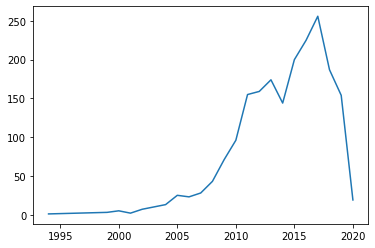

In [45]:
plt.plot(x,y)

- This is negatively skewed distribution
- The sales peaked in the year 2017(sales = 256) and drastically dropped
- The reduction in sales might be due to budget cars released in the country in the past 2 years which could have influenced several buyers to invest in new car rather than spending the amount for used car. The difference in price between used car and recent budget friendly cars might not be very huge. Hence the sales would have reduced. 

In [47]:
df[df['sold'] == 'N']['year'].value_counts().sort_index()

1994      1
1995      1
1996      2
1997      9
1998      9
1999     11
2000     10
2001      4
2002     12
2003     27
2004     38
2005     51
2006     79
2007    145
2008    158
2009    160
2010    279
2011    415
2012    462
2013    494
2014    476
2015    575
2016    631
2017    754
2018    619
2019    429
2020     55
Name: year, dtype: int64

#### Analysis of distribution of cars by fuel type

<AxesSubplot:xlabel='fuel', ylabel='count'>

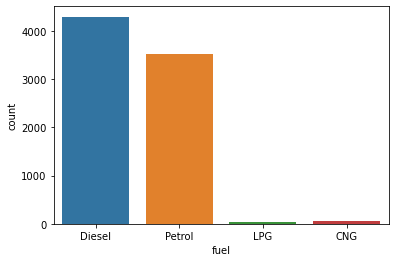

In [48]:
sns.countplot(x='fuel', data=df, orient='h')

- Diesel based cars tops the list followed by petrol
- LPG and CNG based cars are almost negligible relative to diesel and petrol cars

In [54]:
df[df['sold'] == 'Y']['City'].value_counts()

New York City    196
Los Angeles      191
Seattle           86
Chicago           83
Boston            69
                ... 
Secaucus           1
Odessa             1
Kearns             1
Millville          1
Newark             1
Name: City, Length: 275, dtype: int64

<AxesSubplot:>

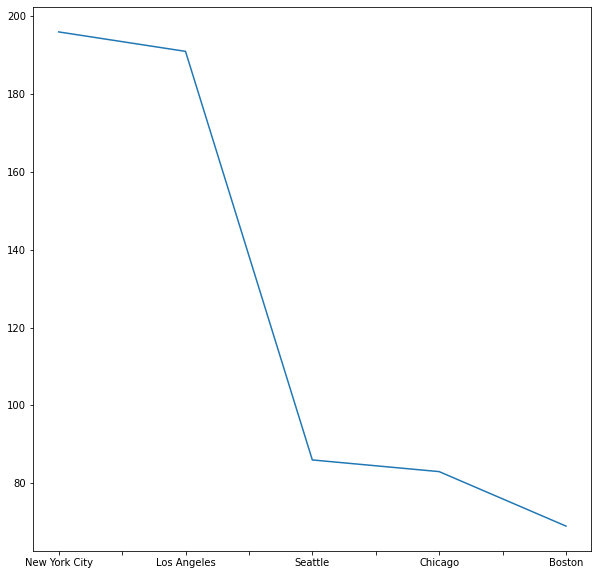

In [55]:
df[df['sold'] == 'Y']['City'].value_counts()[:5].plot(figsize=(10,10))

- New York City,Los Angeles,Seattle,Chicago and Boston cities are top performing based on sales. 
- Cities like Secaucus,Odessa,Kearns have unit(1) sales of used cars. The expenditure to run business in these areas is more than the profit they could generate. Management has to take a call for these cities.

#### Year vs Selling Price by fuel type

<AxesSubplot:xlabel='year', ylabel='selling_price'>

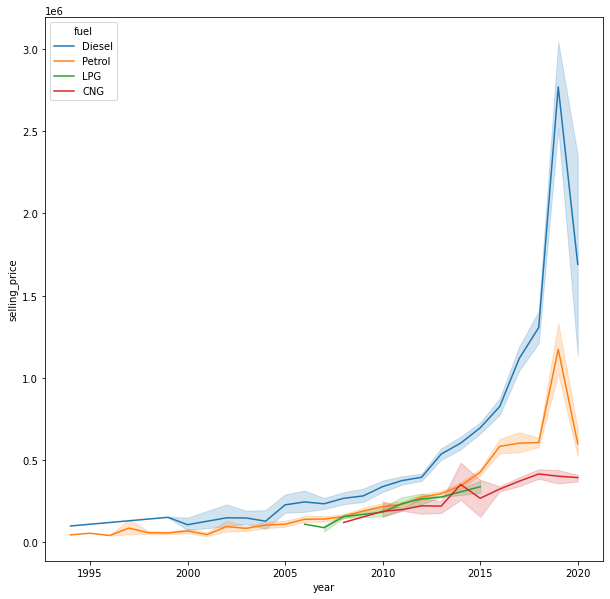

In [57]:
plt.figure(figsize = (10,10))
sns.lineplot(data=df, y='selling_price', x='year', hue='fuel')

- The selling price for all the fuel type cars increases along the year. Diesel type tops the list.
- There is massive drop in selling price of the Diesel and Petrol type cars after 2017-18. This is accounted to the drop in sales of the used cars after 2017 which we analysed previously. To be in the competition they might reduced the selling price of the cars. Dielse and Petrol being the majority in market share

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

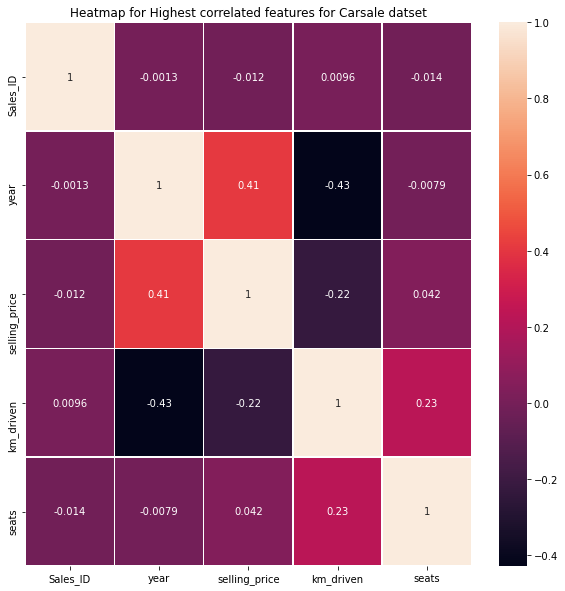

In [59]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

- There are not much highly correlated features. Selling price and year have the highest correlation among all the features.

In [60]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

- No null data

#### 1.	Which seller_type has had the highest sales?

In [61]:
df.head(2)

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   

  Region     State or Province           City    fuel seller_type  \
0   East  District of Columbia     Washington  Diesel  Individual   
1   East              New York  New York City  Diesel  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   

                torque  seats sold  
0       190Nm@ 2000rpm      5    Y  
1  250Nm@ 1500-2500rpm      5    Y

In [62]:
df[df['sold'] == 'Y']['seller_type'].value_counts()

Individual          1629
Dealer               291
Trustmark Dealer      80
Name: seller_type, dtype: int64

- Answer: Individual

#### 2.	Among the seller types, which one has the highest percentage of unsold inventory?

In [64]:
df[df['sold'] == 'N']['seller_type'].value_counts(normalize = True)*100

Individual          83.542161
Dealer              13.816458
Trustmark Dealer     2.641382
Name: seller_type, dtype: float64

#### 3.	Analyse the relationship of mileage vs Max Power. The general understanding is higher the max power, lower the mileage. Validate the same.

In [74]:
df['mileage_int'] = df['mileage'].apply(lambda x:pd.to_numeric(x.split(" ")[0],errors='coerce'))

In [76]:
df['max_power_int'] = df['max_power'].apply(lambda x:pd.to_numeric(x.split(" ")[0],errors='coerce'))

In [77]:
df.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage               object
engine                object
max_power             object
torque                object
seats                  int64
sold                  object
mileage_int          float64
max_power_int        float64
dtype: object

<AxesSubplot:xlabel='max_power_int', ylabel='mileage_int'>

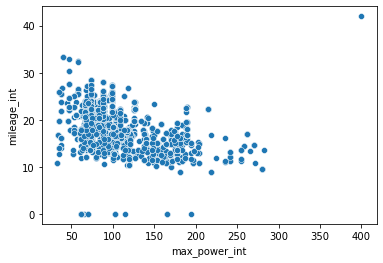

In [78]:
sns.scatterplot(data=df, x="max_power_int", y="mileage_int")

- We can see kind of negative trend but there are few outliers as well. For few of the cases it the mileage remains constant. For most of points we can see inverse correlation

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

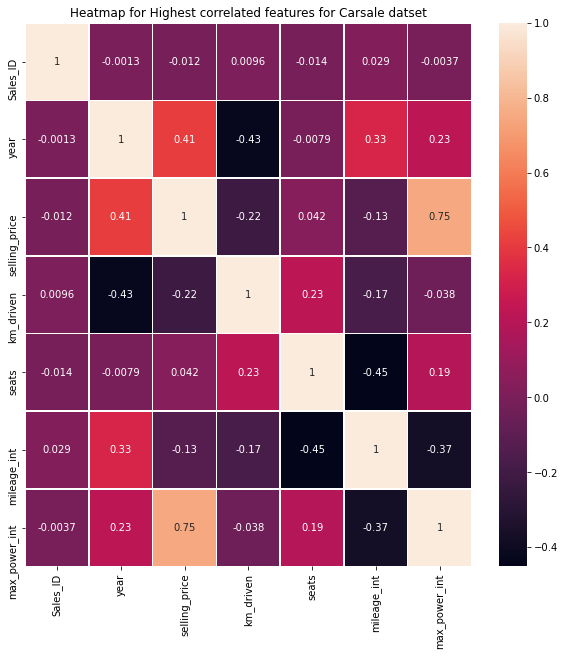

In [79]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

- we can also see the correlation plot that max_power and mileage has negative correlation(-0.37). Hence proved!!

#### 4.	Use selling_price and km_driven to create a metric called price-distance-ratio.

In [80]:
df['price-distance-ratio'] = df['selling_price']/df['km_driven']

In [81]:
df.head(1)

Sales_ID                    name  year  selling_price  km_driven Region  \
0         1  Maruti Swift Dzire VDI  2014         450000     145500   East   

      State or Province        City    fuel seller_type  ...        owner  \
0  District of Columbia  Washington  Diesel  Individual  ...  First Owner   

     mileage   engine max_power          torque seats  sold mileage_int  \
0  23.4 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm     5     Y        23.4   

   max_power_int  price-distance-ratio  
0           74.0              3.092784  

[1 rows x 21 columns]

#### 5.	Identify is there dependency of car selling based on owner.

- Had already done this analysis

<AxesSubplot:xlabel='count', ylabel='sold'>

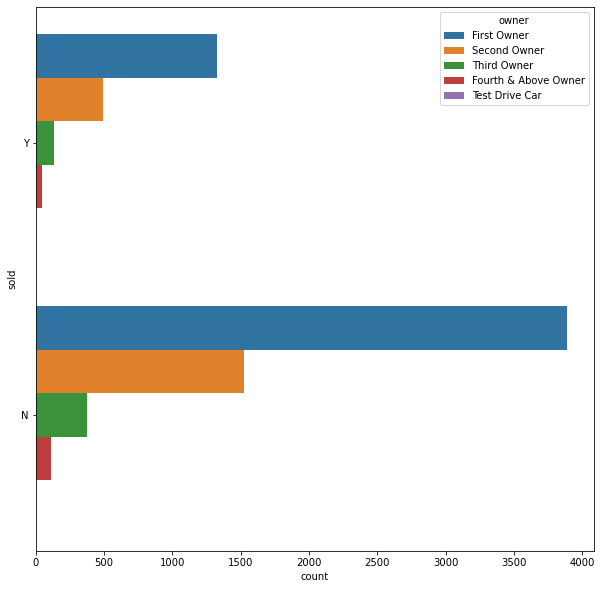

In [82]:
plt.figure(figsize = (10,10))
sns.countplot(y='sold', data=df, orient='h', hue='owner')

- We can see that the customers prefer the reused car coming from first owner as it would be much recent compare to other owner types. 

### Model building

- Looking at the dataset we can say that it is a binary classification problem.
- Sold is the target variable and the rest of them are predictor variables.
- The dataset is highly imbalanced with Y:N ratio of 1:3 (2000Y:6000N)
- Need to one hot encode categorical variables and scale the real value varaibles
- We can start of with building a simple Logistic Regression and try more advance techniques like Decision Trees and Random Forest
- Since the dataset is highly imbalanced its better not to choose Accuracy as the metric for model evaluation. Its better to go with precision or recall or log-loss.
- Once we one hot encode we get ton of features. To do feature selection we could in two of the many ways.
    - Could use Lasso Regularization which reduces few of the coefficients to zero if it had to in case if data is overfitting. This is kind of internal feature selection.
    - Can use ensembles like Random Forest Classifier to get the most important features contributing in predicting the target variable 'Sold' using model.feature_importances_ method. This could be external feature selection.